In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df_mall.iloc[:,[2,3]].values

In [4]:
 wcss = []
for i in range(1,11):   
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    km.fit(X)
    wcss.append(km.inertia_)
wcss

[176108.77999999997,
 87121.56591478694,
 59486.961439280356,
 39529.887967363524,
 31647.075788379854,
 25399.022004416987,
 22413.750036590358,
 18809.570358640594,
 16020.680445349213,
 13723.56577923729]

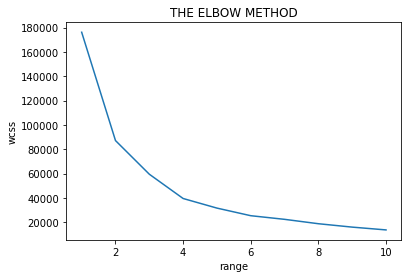

In [5]:
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('range')
plt.ylabel('wcss')
plt.show()

In [6]:
 km = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=1)
y_means = km.fit_predict(X)

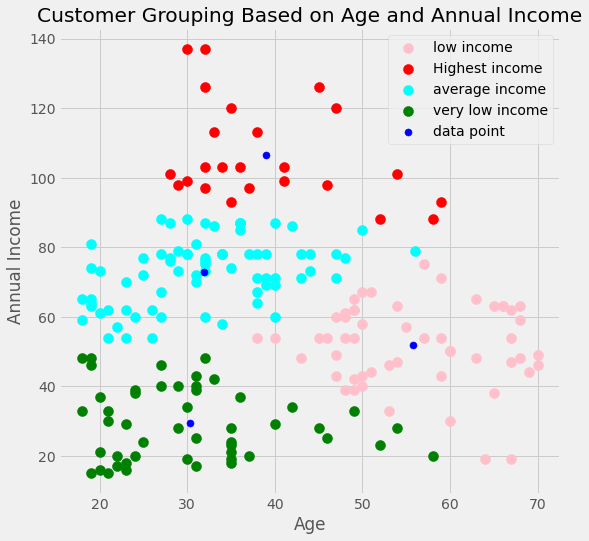

In [7]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(X[y_means ==0,0], X[y_means ==0,1],s=100,c='pink',label = 'low income')
plt.scatter(X[y_means ==1,0], X[y_means ==1,1],s=100,c='red',label = 'Highest income')
plt.scatter(X[y_means ==2,0], X[y_means ==2,1],s=100,c='cyan',label = 'average income')
plt.scatter(X[y_means ==3,0], X[y_means ==3,1],s=100,c='green',label = 'very low income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='data point')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Grouping Based on Age and Annual Income')
plt.legend()
plt.show()

In [8]:
X = df_mall.iloc[:,[2,4]].values

In [9]:
 wcss = []
for i in range(1,11):   
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    km.fit(X)
    wcss.append(km.inertia_)
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23811.5235247209,
 19689.84881221907,
 15523.684014328754,
 13002.4664883828,
 11515.33539021164,
 10204.946770824488]

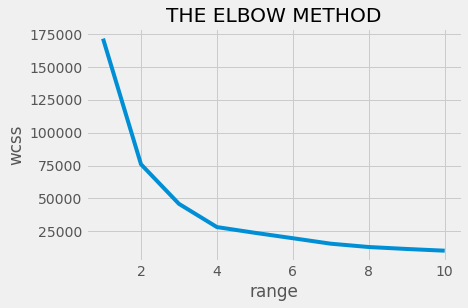

In [10]:
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('range')
plt.ylabel('wcss')
plt.show()

In [11]:
km = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=1)
y_means = km.fit_predict(X)

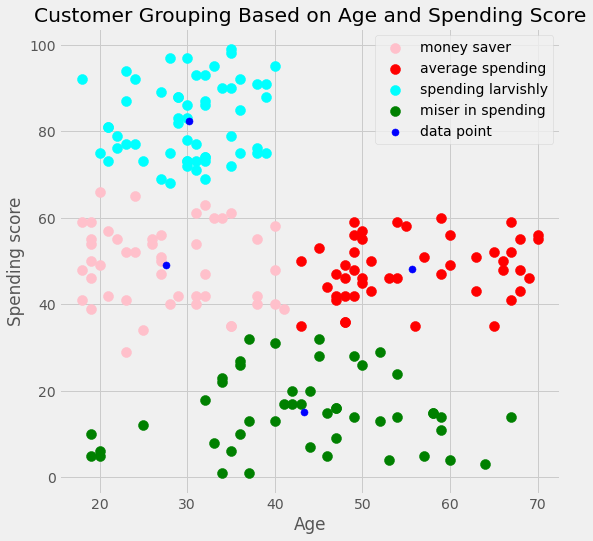

In [12]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(X[y_means ==0,0], X[y_means ==0,1],s=100,c='pink',label='money saver')
plt.scatter(X[y_means ==1,0], X[y_means ==1,1],s=100,c='red',label='average spending')
plt.scatter(X[y_means ==2,0], X[y_means ==2,1],s=100,c='cyan',label ='spending larvishly')
plt.scatter(X[y_means ==3,0], X[y_means ==3,1],s=100,c='green',label='miser in spending')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='data point')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('Customer Grouping Based on Age and Spending Score')
plt.legend()
plt.show()